# Clean and Analyze Employee Exit Surveys

In this project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. The stakeholders of these organizations have questions around employee resignation. We hope to utilize employee exit surveys to answer the following: 
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

DETE Survey data can be found [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)  
TAFE Survey data is no longer available online

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in the data 
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

## Data Exploration

Below we get a preview of the structure of both of our datasets. Eventually, the goal is to combine our datasets so it's important to note the different structures.

In [3]:
dete_survey.head(3)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [5]:
tafe_survey.head(3)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In both datasets, there are columns that represent reasons for resignation and information about the employee. Both datasets have many columns that we don't need for our analysis.

# Data Cleaning

The DETE dataset represents missing values with 'Not Stated' so we'll change those to NaN. We'll also get rid of columns that we don't need for our analysis. 

In [7]:
# Read in the data again, but this time read `Not Stated` values as `NaN`
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

### Rename Columns

In [8]:
# drop columns we don't need
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

In [9]:
# drop columns we don't need
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [10]:
# change column headers to snake case
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ', '_').str.strip().str.lower()
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [11]:
# change column names in TAFE data to match DETE data
tafe_survey_updated.rename( columns = {
                            'Record ID': 'id',
                            'CESSATION YEAR': 'cease_date',
                            'Reason for ceasing employment': 'separationtype',
                            'Gender. What is your Gender?': 'gender',
                            'CurrentAge. Current Age': 'age',
                            'Employment Type. Employment Type': 'employment_status',
                            'Classification. Classification': 'position',
                            'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                            'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'},
                             inplace=True
                          )

### Filter the Data

We want to isolate the survey data for only the respondents who have resignation as a separation type. The DETE dataset has a few different values related to resignation so we will include all of them.

In [12]:
# comparing values in separation type column
print(tafe_survey_updated['separationtype'].value_counts())
dete_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [13]:
# new datasets for respondents who resigned
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation')]
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation']

### Verifying the Data

Below, we clean and explore values in the <code>cease_date</code> and <code>dete_start_date</code> columns. <code>cease_date</code> represents the last day of employment and <code>dete_start_date</code> represents the first day of employment so it wouldn't make sense to have dates past the current year. Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

In [14]:
# reviewing the cease_date values
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

In [15]:
# switch off settingwithcopywarning
pd.set_option('mode.chained_assignment', None)
# extract year values and convert to float
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(r'([1-2][0-9]{3})')[0].astype(float)
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [16]:
# checking unique values for outliers
dete_resignations['dete_start_date'].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [17]:
# reviewing the cease_date values
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

### Creating New Column

One of the questions we are trying to answer is: 
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction What about employees who have been there longer?

The TAFE dataset already has a column that says how many years the employee worked for the institute: <code>institute_service</code>. Below this column to our DETE dataset by subtracting the start year from the cease year.

In [18]:
# calulate how long respondent worked for institute
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

## Identifying Dissatisfied Employees

Next we want to isolate employees who resigned because they were dissatisfied. We'll use the below columns to indicate if an employee was dissatisfied. 

tafe_survey_updated:
* <code>Contributing Factors. Dissatisfaction</code>
* <code>Contributing Factors. Job Dissatisfaction</code>

dafe_survey_updated:
* <code>job_dissatisfaction</code>
* <code>dissatisfaction_with_the_department</code>
* <code>physical_work_environment</code>
* <code>lack_of_recognition</code>
* <code>lack_of_job_security</code>
* <code>work_location</code>
* <code>employment_conditions</code>
* <code>work_life_balance</code>
* <code>workload</code>

We'll create a new boolean column to track dissatisfied employees:
* True: employee resigned because they were dissatisfied 
* False: employee resigned for reasons other than dissatisfaction (NaN values will be considered False)

In [19]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [20]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [21]:
# function that updates value to boolean
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True

In [22]:
# new boolean column to indicate dissatisfied employee
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 
                                                       'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1)

# check unique values
tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    249
True      91
Name: dissatisfied, dtype: int64

In [23]:
# new boolean column to indicate dissatisfied employee
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction', 
                                                       'dissatisfaction_with_the_department',
                                                       'physical_work_environment',
                                                       'lack_of_recognition',
                                                       'lack_of_job_security',
                                                       'work_location',
                                                       'employment_conditions',
                                                       'work_life_balance',
                                                       'workload']].any(axis=1, skipna=False)
# check unique values
dete_resignations['dissatisfied'].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

## Combining the Datasets

Now we will combine the datasets. We'll drop any columns that have more than 500 null values as we won't need these for our analysis. 

In [24]:
# add columns to indicate which inistitute the employee is from
dete_resignations['institute'] = 'DETE'
tafe_resignations['institute'] = 'TAFE'

In [25]:
# concat dataframes
combined = pd.concat([dete_resignations, tafe_resignations])

In [26]:
# drop columns with more than 500 null values
combined_updated = combined.dropna(axis=1, thresh=500)

## Coverting the Service Column

Below we see the unique values in the <code>institute_service</code> column. Some of the values represent a range so we'll want to convert these to a numeric value. After that, we'll group the respondents into career stages determined by how many years they worked at the institute. 
* New: less than 3 years
* Experienced: 3-6 years
* Established: 7-10 years
* Veteran: more than 10 years

We created these stages somewhat based on this article: [here](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage)

In [27]:
# check unique values
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
14.0                   6
12.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
32.0                   3
39.0                   3
19.0                   3
21.0                   3
36.0                   2
25.0                   2
30.0                   2
26.0                   2
28.0                   2
49.0                   1


In [28]:
pd.options.mode.chained_assignment = None #ignore chained assignment warning
# convert column to string
combined_updated['institute_service'] = combined_updated['institute_service'].astype(str)

In [29]:
# function to determine career stage category by num of years worked
def career_stages(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return 'New'
    elif 3 <= val <= 6:
        return 'Experienced'
    elif 7 <= val <= 10:
        return 'Established'
    elif val >= 11:
        return 'Veteran'

In [30]:
# create new column for category
combined_updated['service_cat'] = combined_updated['institute_service'].str.extract(r'([0-9]{1,2})')[0].astype(float).apply(career_stages)
# check unique values
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

## Converting the Age Column

The <code>age</code> column has a range listed for each employee, see below. We'll keep the first age in the range and add a column that groups the employee in an age bracket (similar to what we did for the service column). These are the age brackets:
* 25 and under
* 35 to 26
* 36 to 50
* Over 50

In [31]:
combined_updated['age'].value_counts()

51-55            71
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
31  35           32
26  30           32
21-25            29
56 or older      29
31-35            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [32]:
# keep first age in range
combined_updated['age'].str[:2].astype(float)

# function to determine age categories
def age_bucket(age):
    if pd.isnull(age):
        return np.nan
    if age > 50:
        return 'Over 50'
    elif 36 <= age <= 50:
        return '36 to 50'
    elif 26 <= age <= 35:
        return '26 to 35'
    elif age <= 25:
        return '25 and under'

In [33]:
# new column for age brackets
combined_updated['age_bracket'] = combined_updated['age'].str[:2].astype(float).apply(age_bucket)

## Analysis

Now that we've cleaned and combined our data, we can try to find the answers to the stakeholder's questions:
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

#### Comparing Dissatisfied Employees by Time at Company

In [34]:
# percentage of employees who left due to dissatisfaction in each career stage
dissatisfied_stage = combined_updated.pivot_table(values='dissatisfied', index='service_cat')
dissatisfied_stage

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


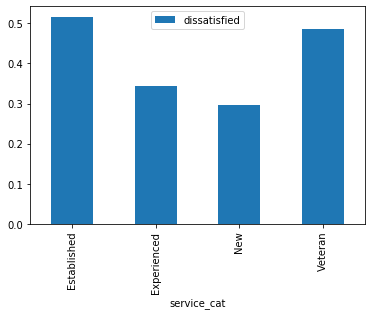

In [35]:
dissatisfied_stage.plot(kind='bar')
plt.show()

Taking a look at the chart and bar plot above, there are a higher percentage of employees who have been at the company longer who leave because they are dissatisfied.
* around 50% of employee who've been with the company for 7+ years (Established and Veteran)
* around 30-35% of employees who've been with the company for 6 years or less (New and Experienced) 

#### Comparing Dissatisfied Employees by Age

In [36]:
age_dissatisfied = combined_updated.pivot_table(values='dissatisfied', index='age_bracket')
age_dissatisfied

,dissatisfied
age_bracket,
25 and under,0.291667
26 to 35,0.398438
36 to 50,0.368421
Over 50,0.422819


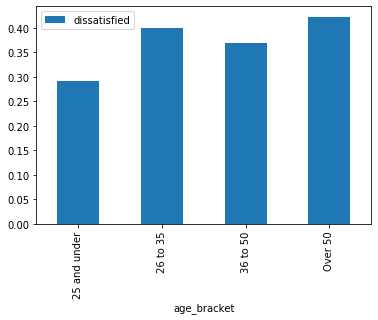

In [37]:
age_dissatisfied.plot(kind='bar')

When comparing the youngest (25 and under) and oldest (over 50) employees, the older employees are more likely to leave due to dissatisfaction.

## Conclusion

In conclusion, employees who only worked for the institutes for a short period of time are less likely to resign due to some kind of dissatisfaction. Roughly half of the employees who had been with the institute for more than 7 years resigned due to some kind of dissatisfaction, almost 15% more than people who had been with the institute for less than 7 years. We saw a similar trend with age, there was a higher percentage of older employees resgining because they were dissatisfied compared to their younger counter parts. Employees 25 and under had the lowest number of dissatisfied employees (30%) and employees over 50 had the most (42%). While the age bracket 26-35 (39.8%) had 3% more employees resign due to dissatisfaction compared to 36-50 (36.8%).